# Bootstrapping in python

2019-11-3

Bootstrap is a resampling method by independently sampling with replacement from an existing sample data with same sample size n, and performing inference among these resampled data. It is widely applied in statistical inferences such as confidence interval, regression model, and even the field of machine learning. 

Generally, a non-parameter bootstrap involves the following steps:

1. A sample from population with sample size n.
2. Draw a sample from the original sample data with replacement with size n, and replicate B times, each re-sampled sample is called a Bootstrap Sample, and there will totally B Bootstrap Samples.
3. Evaluate the statistic of θ for each Bootstrap Sample, and there will be totally B estimates of θ.
4. Construct a sampling distribution with these B Bootstrap statistics and use it to make further statistical inference, such as:        
-Estimating the standard error of statistic for θ.       
-Obtaining a Confidence Interval for θ.

To do a parameter bootstrap, you can just use an estimator of the population parameter (such as a MOM estimator) to generate a new sample with size n, and resample from the new sample for B times to get your Bootstrap Samples. Here we use a simple non-parameter bootstrap example to illustrate how to do this in Python.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

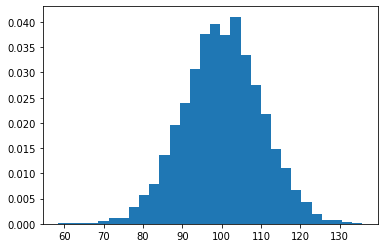

In [2]:
# generate a normal population
mean=100
std = 10
pop = np.random.normal(loc=mean, scale=std, size=5000)
# plot the population
count, bins, ignored = plt.hist(pop, 30, density=True)
plt.show()

(array([5.15533051e-04, 0.00000000e+00, 5.15533051e-04, 5.15533051e-04,
        2.06213221e-03, 6.18639662e-03, 1.39193924e-02, 3.35096483e-02,
        6.90814289e-02, 9.74357467e-02, 1.61877378e-01, 2.18070481e-01,
        3.14475161e-01, 4.28923499e-01, 4.97489395e-01, 5.34607774e-01,
        6.07813468e-01, 5.62962092e-01, 4.34594362e-01, 4.07786644e-01,
        2.79934447e-01, 2.04666621e-01, 1.34038593e-01, 7.57833586e-02,
        3.09319831e-02, 2.21679212e-02, 6.70192967e-03, 5.15533051e-03,
        2.57766526e-03, 1.03106610e-03]),
 array([ 97.00112419,  97.19509818,  97.38907216,  97.58304615,
         97.77702013,  97.97099411,  98.1649681 ,  98.35894208,
         98.55291607,  98.74689005,  98.94086404,  99.13483802,
         99.328812  ,  99.52278599,  99.71675997,  99.91073396,
        100.10470794, 100.29868193, 100.49265591, 100.68662989,
        100.88060388, 101.07457786, 101.26855185, 101.46252583,
        101.65649982, 101.8504738 , 102.04444778, 102.23842177,
      

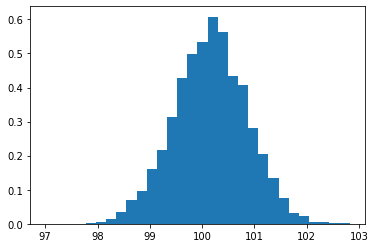

In [3]:
# Now pretend that you do not know your parameter. let's use bootstrap to estimate them.
B=10000
sample_props = []
for i in range(B):
    sample = np.random.choice(pop, size=200)
    sample_props.append(sample.mean())
    
# plot the simulated sampling distribution of the sample mean, 
# under the Central Limit Theorem, it is expected normal.
plt.hist(sample_props,30, density=True)

In [4]:
# the simulated mean of the sampling distribution
simulated_mean = np.mean(sample_props)

# the simulated standard deviation of the sampling distribution
simulated_std = np.std(sample_props)

# the theorical mean and simulated mean
print(pop.mean(), simulated_mean)

# the theorical standard error and simulated standard error
# the standard error of the sample mean is the population standard error over square root of the sample size.
print(pop.std(), simulated_std*200**0.5)

100.16562479450018 100.15765445005621
9.955012092566243 9.834515407664911


There is also a python library called `bootsrapped`. You can use it to construct confidence intervals more easily.

In [5]:
pip install bootstrapped

You are using pip version 9.0.3, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [6]:
import numpy as np
import bootstrapped.bootstrap as bs
import bootstrapped.stats_functions as bs_stats

mean = 100
std = 10
pop = np.random.normal(loc=mean, scale=std, size=1000)
sample = np.random.choice(pop, size=200)

print(bs.bootstrap(sample, stat_func=bs_stats.mean))
print(bs.bootstrap(sample, stat_func=bs_stats.std))


99.72638138367365    (98.30637933423048, 101.06408051284359)
9.772842016344663    (8.744422612570279, 10.866689161741167)
